In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"



In [4]:
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [5]:

from bfseg.data.meshdist.dataLoader import DataLoader
from bfseg.data.meshdist.tbMonitor import TensorBoardMonitor

In [6]:

import segmentation_models as sm
import tensorflow as tf
import matplotlib.pyplot as plt

Segmentation Models: using `tf.keras` framework.


In [5]:

#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

In [7]:
def ignorant_cross_entropy_loss(y_true, y_pred, class_to_ignore = 1, num_classes = 3, weight_imbalance = False):
    """
    Loss function that ignores all classes with label class_to_ignore.

    Args:
        y_true: Ground truth labels
        y_pred: Predicted labels
        class_to_ignore: Class number from ground truth which should be ignored
        num_classes: how many classes there are

    Returns: Cross entropy loss where ground truth labels that have class 'class_to_ignore' are ignored
    """
    _,_,_,c = tf.shape(y_true)
    # convert true labels to one hot encoded images
    data = tf.squeeze(tf.keras.backend.one_hot(y_true, 3))
    # extracts classes that should be ignored
    ignore = data[..., class_to_ignore]
    # invert class to be used as weights
    ignore_inverted = tf.cast(tf.math.logical_not(tf.cast(ignore, tf.bool)), tf.int32)
    # 
    # Remove class that should be ignored from one hot encoding
    y_true_one_hot_no_ignore = tf.stack([data[..., _class] for _class in range(num_classes) if _class != class_to_ignore], axis=-1)

    # Transform one hot encoding back to categorical
    y_true_back = tf.cast(tf.math.argmax(y_true_one_hot_no_ignore, axis=-1), tf.int64)
    # Todo implement weight implance
    scce = tf.keras.losses.SparseCategoricalCrossentropy()
    return scce(y_true_back, y_pred, sample_weight=ignore_inverted)

In [8]:
workingdir = "/home/rene/cla_dataset/cam0_preprocessed/"

# Desired image shape. Input images will be cropped + scaled to this shape
image_w = 720
image_h = 480

dataLoader = DataLoader(workingdir, [image_h, image_w],  validationDir ='/home/rene/hiveLabels/', validationMode="CLA")
train_ds, test_ds = dataLoader.getDataset()


In [9]:
BACKBONE = "vgg16"
model = sm.PSPNet(BACKBONE, input_shape=(image_h, image_w, 3), classes=2)

model.compile(
    loss=ignorant_cross_entropy_loss,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)
model.load_weights('../..//src/model.15-4.04.h5')



In [16]:
for img, label in train_ds.take(1):
    break
for test_img, test_label in test_ds.take(1):
    break

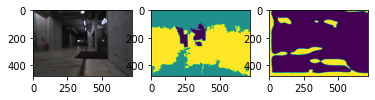

In [64]:
plt.subplot(2,3,1)
plt.imshow(img[0,...])
plt.subplot(2,3,2)
plt.imshow(label[0,...])
plt.subplot(2,3,3)
prediction = model.predict(img)
plt.imshow(tf.argmax(prediction,axis = -1)[0,...])

In [35]:
prediction[red] = 0

/home/rene/tf_venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


In [38]:
ignorant_cross_entropy_loss(label, prediction)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8004294>

In [32]:
red = tf.reduce_sum(tf.cast(prediction > 0.9, tf.int32), axis = -1)

In [41]:
data = tf.squeeze(tf.keras.backend.one_hot(label, 3))
# extracts classes that should be ignored
ignore = data[..., 1]

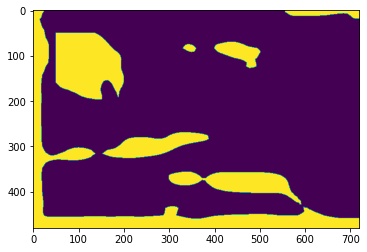

In [68]:
prediction[...,50:200,50:200,1] += 0.5
plt.imshow(tf.argmax(prediction,axis = -1)[0,...])

In [51]:
last_pred_layer = prediction[..., 1]

In [52]:
last_pred_layer = last_pred_layer + ignore

In [55]:
pred  = prediction
pred[...,1] = last_pred_layer

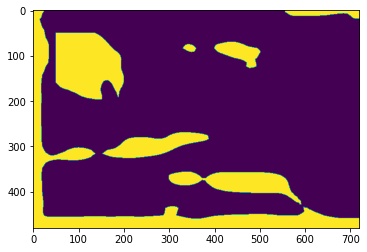

In [69]:
plt.imshow(tf.argmax(prediction,axis = -1)[0,...])

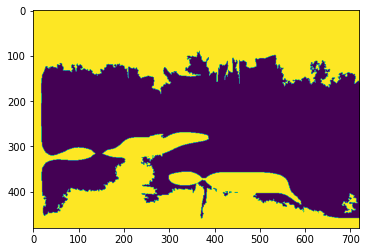

In [59]:
plt.imshow(tf.argmax(pred,axis = -1)[0,...])

In [70]:
ignorant_cross_entropy_loss(label, prediction)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7761412>

In [62]:
ignorant_cross_entropy_loss(label, pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8004294>

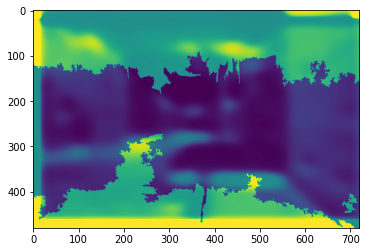

In [54]:
plt.imshow(last_pred_layer[0,...])

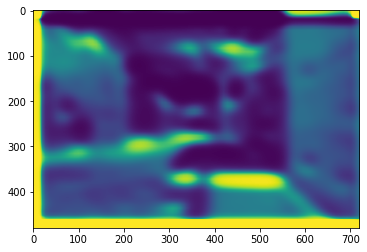

In [49]:
plt.imshow(prediction[..., 1][0,...])

In [ ]:

plt.imshow(tf.argmax(pred,axis = -1)[0,...])

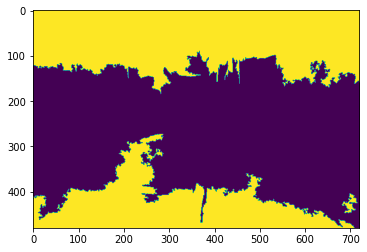

In [43]:
plt.imshow(ignore[0,...])

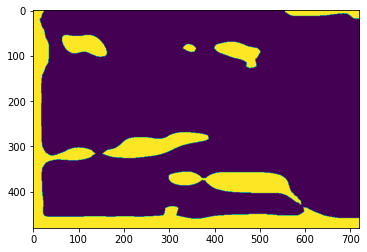

In [37]:
plt.imshow(tf.argmax(prediction,axis = -1)[0,...])

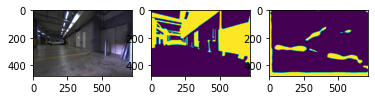

In [18]:
plt.subplot(2,3,4)
plt.imshow(test_img[0,...])
plt.subplot(2,3,5)
plt.imshow(test_label[0,...])
plt.subplot(2,3,6)
plt.imshow(tf.argmax(model.predict(test_img),axis = -1)[0,...])

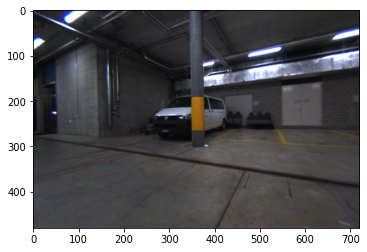

In [10]:
plt.imshow(img[0])

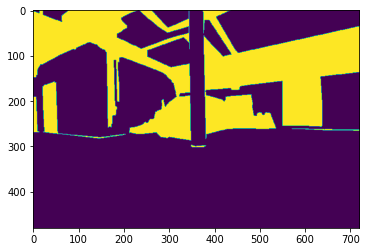

In [14]:
plt.imshow(label[0] == 2)

In [41]:
result = tf.cond(c < 3, lambda: 2, lambda: 4)


In [46]:
for img_t, label_t in train_ds.take(1):
    break

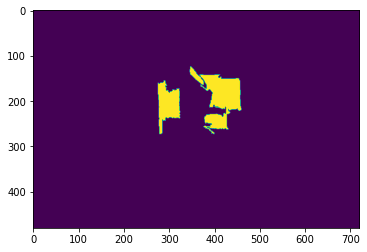

In [51]:
plt.imshow(label_t[0] == 0)

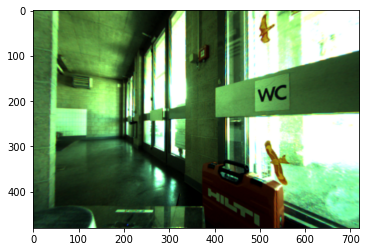

In [57]:
plt.imshow(img[0,...])

In [54]:
label = tf.math.multiply(tf.cast(tf.math.logical_not(tf.cast(label, tf.bool)), tf.int32), 2)

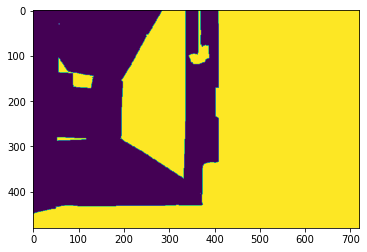

In [56]:
plt.imshow(label[0,...])

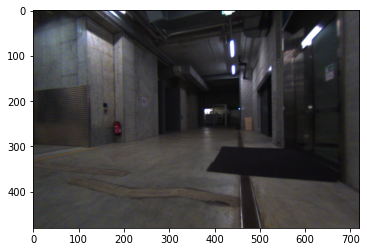

In [49]:
plt.imshow(img_t[0])

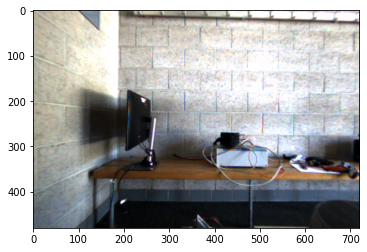

In [31]:
plt.imshow(img[1,...])

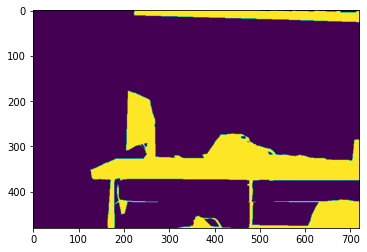

In [53]:
plt.imshow((label[1,...] > 0) == False)

In [16]:
test_pred_raw = model.predict(img)

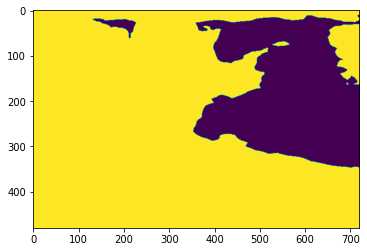

In [20]:
plt.imshow(tf.argmax(test_pred_raw,axis = -1)[1,...])